### Load weights (theirs names/shapes/values) from the saved model

In [4]:
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
from tensorflow.python import pywrap_tensorflow

import matplotlib.pylab as plt
%matplotlib inline

In [5]:
MODEL_PATH = '/home/julia/magenta-demos/jupyter-notebooks/wavenet-ckpt/model.ckpt-200000'

# print_tensors_in_checkpoint_file(file_name=MODEL_PATH, tensor_name='', all_tensors=False)
# print_tensors_in_checkpoint_file(file_name=MODEL_PATH, tensor_name='ae_bottleneck/W', all_tensors=False)

reader = pywrap_tensorflow.NewCheckpointReader(MODEL_PATH)

var_to_shape_map  = reader.get_variable_to_shape_map()
for key,value in sorted(var_to_shape_map.items()):
    print("{}: {}".format(key, value))

ae_bottleneck/W: [1, 1, 128, 16]
ae_bottleneck/W/Adam: [1, 1, 128, 16]
ae_bottleneck/W/Adam_1: [1, 1, 128, 16]
ae_bottleneck/W/ExponentialMovingAverage: [1, 1, 128, 16]
ae_bottleneck/biases: [16]
ae_bottleneck/biases/Adam: [16]
ae_bottleneck/biases/Adam_1: [16]
ae_bottleneck/biases/ExponentialMovingAverage: [16]
ae_dilatedconv_1/W: [1, 3, 128, 128]
ae_dilatedconv_1/W/Adam: [1, 3, 128, 128]
ae_dilatedconv_1/W/Adam_1: [1, 3, 128, 128]
ae_dilatedconv_1/W/ExponentialMovingAverage: [1, 3, 128, 128]
ae_dilatedconv_1/biases: [128]
ae_dilatedconv_1/biases/Adam: [128]
ae_dilatedconv_1/biases/Adam_1: [128]
ae_dilatedconv_1/biases/ExponentialMovingAverage: [128]
ae_dilatedconv_10/W: [1, 3, 128, 128]
ae_dilatedconv_10/W/Adam: [1, 3, 128, 128]
ae_dilatedconv_10/W/Adam_1: [1, 3, 128, 128]
ae_dilatedconv_10/W/ExponentialMovingAverage: [1, 3, 128, 128]
ae_dilatedconv_10/biases: [128]
ae_dilatedconv_10/biases/Adam: [128]
ae_dilatedconv_10/biases/Adam_1: [128]
ae_dilatedconv_10/biases/ExponentialMovingA

dilatedconv_27/biases/Adam: [1024]
dilatedconv_27/biases/Adam_1: [1024]
dilatedconv_27/biases/ExponentialMovingAverage: [1024]
dilatedconv_28/W: [1, 3, 512, 1024]
dilatedconv_28/W/Adam: [1, 3, 512, 1024]
dilatedconv_28/W/Adam_1: [1, 3, 512, 1024]
dilatedconv_28/W/ExponentialMovingAverage: [1, 3, 512, 1024]
dilatedconv_28/biases: [1024]
dilatedconv_28/biases/Adam: [1024]
dilatedconv_28/biases/Adam_1: [1024]
dilatedconv_28/biases/ExponentialMovingAverage: [1024]
dilatedconv_29/W: [1, 3, 512, 1024]
dilatedconv_29/W/Adam: [1, 3, 512, 1024]
dilatedconv_29/W/Adam_1: [1, 3, 512, 1024]
dilatedconv_29/W/ExponentialMovingAverage: [1, 3, 512, 1024]
dilatedconv_29/biases: [1024]
dilatedconv_29/biases/Adam: [1024]
dilatedconv_29/biases/Adam_1: [1024]
dilatedconv_29/biases/ExponentialMovingAverage: [1024]
dilatedconv_3/W: [1, 3, 512, 1024]
dilatedconv_3/W/Adam: [1, 3, 512, 1024]
dilatedconv_3/W/Adam_1: [1, 3, 512, 1024]
dilatedconv_3/W/ExponentialMovingAverage: [1, 3, 512, 1024]
dilatedconv_3/biases

In [6]:
reader.get_tensor('ae_dilatedconv_1/W')[0, 0, 0, :10]

array([-0.0528511 , -0.02515673,  0.0140805 , -0.13768223, -0.01240699,
       -0.02296777,  0.01542632,  0.08756878,  0.01287957, -0.06621572],
      dtype=float32)

In [7]:
ae_dilated_layers = [key for key in var_to_shape_map.keys() if key.startswith('ae_dilated') and key.endswith('W')]
ae_res_layers = [key for key in var_to_shape_map.keys() if key.startswith('ae_res') and key.endswith('W')]
ae_bottleneck_layers = [key for key in var_to_shape_map.keys() if key.startswith('ae_bottleneck') and key.endswith('W')]

In [8]:
for key in sorted(ae_dilated_layers):
    print(key, reader.get_tensor(key).shape)

ae_dilatedconv_1/W (1, 3, 128, 128)
ae_dilatedconv_10/W (1, 3, 128, 128)
ae_dilatedconv_11/W (1, 3, 128, 128)
ae_dilatedconv_12/W (1, 3, 128, 128)
ae_dilatedconv_13/W (1, 3, 128, 128)
ae_dilatedconv_14/W (1, 3, 128, 128)
ae_dilatedconv_15/W (1, 3, 128, 128)
ae_dilatedconv_16/W (1, 3, 128, 128)
ae_dilatedconv_17/W (1, 3, 128, 128)
ae_dilatedconv_18/W (1, 3, 128, 128)
ae_dilatedconv_19/W (1, 3, 128, 128)
ae_dilatedconv_2/W (1, 3, 128, 128)
ae_dilatedconv_20/W (1, 3, 128, 128)
ae_dilatedconv_21/W (1, 3, 128, 128)
ae_dilatedconv_22/W (1, 3, 128, 128)
ae_dilatedconv_23/W (1, 3, 128, 128)
ae_dilatedconv_24/W (1, 3, 128, 128)
ae_dilatedconv_25/W (1, 3, 128, 128)
ae_dilatedconv_26/W (1, 3, 128, 128)
ae_dilatedconv_27/W (1, 3, 128, 128)
ae_dilatedconv_28/W (1, 3, 128, 128)
ae_dilatedconv_29/W (1, 3, 128, 128)
ae_dilatedconv_3/W (1, 3, 128, 128)
ae_dilatedconv_30/W (1, 3, 128, 128)
ae_dilatedconv_4/W (1, 3, 128, 128)
ae_dilatedconv_5/W (1, 3, 128, 128)
ae_dilatedconv_6/W (1, 3, 128, 128)
ae_dila

In [9]:
for key in sorted(ae_res_layers):
    print(key, reader.get_tensor(key).shape)

ae_res_1/W (1, 1, 128, 128)
ae_res_10/W (1, 1, 128, 128)
ae_res_11/W (1, 1, 128, 128)
ae_res_12/W (1, 1, 128, 128)
ae_res_13/W (1, 1, 128, 128)
ae_res_14/W (1, 1, 128, 128)
ae_res_15/W (1, 1, 128, 128)
ae_res_16/W (1, 1, 128, 128)
ae_res_17/W (1, 1, 128, 128)
ae_res_18/W (1, 1, 128, 128)
ae_res_19/W (1, 1, 128, 128)
ae_res_2/W (1, 1, 128, 128)
ae_res_20/W (1, 1, 128, 128)
ae_res_21/W (1, 1, 128, 128)
ae_res_22/W (1, 1, 128, 128)
ae_res_23/W (1, 1, 128, 128)
ae_res_24/W (1, 1, 128, 128)
ae_res_25/W (1, 1, 128, 128)
ae_res_26/W (1, 1, 128, 128)
ae_res_27/W (1, 1, 128, 128)
ae_res_28/W (1, 1, 128, 128)
ae_res_29/W (1, 1, 128, 128)
ae_res_3/W (1, 1, 128, 128)
ae_res_30/W (1, 1, 128, 128)
ae_res_4/W (1, 1, 128, 128)
ae_res_5/W (1, 1, 128, 128)
ae_res_6/W (1, 1, 128, 128)
ae_res_7/W (1, 1, 128, 128)
ae_res_8/W (1, 1, 128, 128)
ae_res_9/W (1, 1, 128, 128)


In [10]:
for key in sorted(ae_bottleneck_layers):
    print(key, reader.get_tensor(key).shape)

ae_bottleneck/W (1, 1, 128, 16)


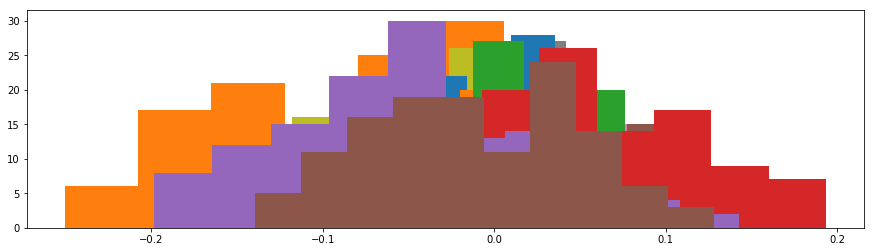

In [11]:
plt.figure(figsize = (15, 4))
for raw in reader.get_tensor(key)[-1,-1,:,:].T:
    plt.hist(raw)
